In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [32]:
training_data = pd.read_csv('/root/ubc/train.csv')
tma_data = training_data[training_data['is_tma'] == True]
tma_data['path'] = '/root/ubc_ocean/TMA_images/train_images/' + tma_data['image_id'].astype(str) + '.png'
tma_data.reset_index(drop=True, inplace=True)

tma_data

/tmp/ipykernel_146683/636692245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tma_data['path'] = '/root/ubc_ocean/TMA_images/train_images/' + tma_data['image_id'].astype(str) + '.png'


,image_id,label,image_width,image_height,is_tma,path
0,91,HGSC,3388,3388,True,/root/ubc_ocean/TMA_images/train_images/91.png
1,4134,MC,2964,2964,True,/root/ubc_ocean/TMA_images/train_images/4134.png
2,8280,HGSC,2964,2964,True,/root/ubc_ocean/TMA_images/train_images/8280.png
3,9200,MC,3388,3388,True,/root/ubc_ocean/TMA_images/train_images/9200.png
4,13568,LGSC,2964,2964,True,/root/ubc_ocean/TMA_images/train_images/13568.png
5,17637,HGSC,2964,2964,True,/root/ubc_ocean/TMA_images/train_images/17637.png
6,21020,MC,3388,3388,True,/root/ubc_ocean/TMA_images/train_images/21020.png
7,29084,LGSC,3388,3388,True,/root/ubc_ocean/TMA_images/train_images/29084.png
8,31594,EC,3388,3388,True,/root/ubc_ocean/TMA_images/train_images/31594.png
9,35565,MC,2964,2964,True,/root/ubc_ocean/TMA_images/train_images/35565.png


In [ ]:
training_data = pd.read_csv('/root/ubc/train.csv')
tma_data = training_data[training_data['is_tma'] == True]
tma_data['path'] = '/root/ubc_ocean/TMA_images/train_images/' + tma_data['image_id'].astype(str) + '.png'
tma_data.reset_index(drop=True, inplace=True)

tma_data

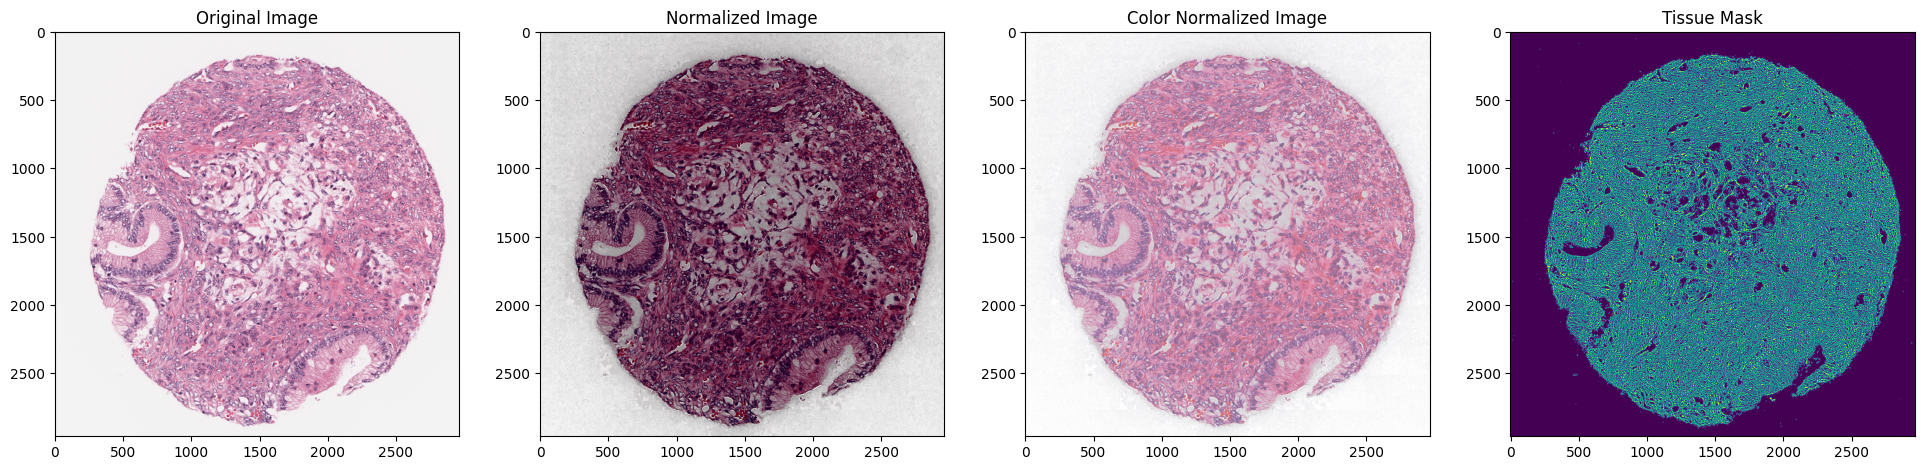

In [93]:
import cv2
import numpy as np
from skimage import io, color
from matplotlib import pyplot as plt

def normalize_image(image):
    # Histogram equalization for brightness and contrast adjustment
    image_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])
    normalized_image = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
    return normalized_image

def color_normalize(image, target_image):
    # Convert images to LAB color space
    image_lab = color.rgb2lab(image)
    target_lab = color.rgb2lab(target_image)

    # Apply color normalization (Reinhard method as an example)
    for i in range(3):
        image_lab[:,:,i] = (image_lab[:,:,i] - np.mean(image_lab[:,:,i])) / np.std(image_lab[:,:,i])
        image_lab[:,:,i] = image_lab[:,:,i] * np.std(target_lab[:,:,i]) + np.mean(target_lab[:,:,i])

    normalized_color = color.lab2rgb(image_lab)

    # Convert back to 8-bit format
    normalized_color = np.clip(normalized_color, 0, 1)
    normalized_color = (normalized_color * 255).astype(np.uint8)

    return normalized_color

def segment_tissue(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    mask  = cv2.adaptiveThreshold(blurred, 255, 
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
    return mask


# Example usage
image_path = "/root/ubc_ocean/TMA_images/train_images/4134.png"  # Replace with your image path
original_image = io.imread(image_path)
normalized_image = normalize_image(original_image)

# You will need a target image for color normalization
target_image_path = "/root/ubc_ocean/TMA_images/train_images/4134.png"  # Replace with your target image path
target_image = io.imread(target_image_path)
color_normalized_image = color_normalize(normalized_image, target_image)

tissue_mask = segment_tissue(original_image)

# Display the results
plt.figure(figsize=(24, 8))  # Adjust the size as needed
plt.subplot(1, 4, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.subplot(1, 4, 2)
plt.imshow(normalized_image)
plt.title('Normalized Image')
plt.subplot(1, 4, 3)
plt.imshow(color_normalized_image)
plt.title('Color Normalized Image')
plt.subplot(1, 4, 4)
plt.imshow(tissue_mask)
plt.title('Tissue Mask')
plt.show()

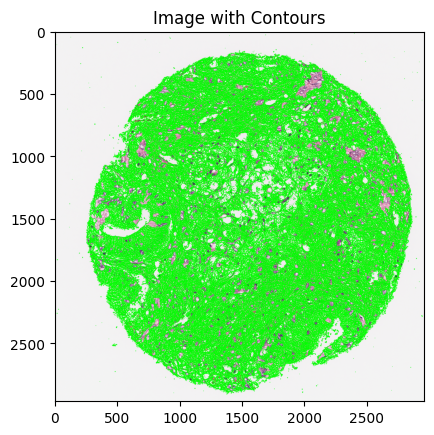

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_contours(image, mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_img = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 3)
    plt.imshow(contour_img)
    plt.title("Image with Contours")
    plt.show()

# Example usage
image_path = '/root/ubc_ocean/TMA_images/train_images/4134.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply segmentation
mask = segment_tissue(image)

# Visualize contours on the image
visualize_contours(image, mask)

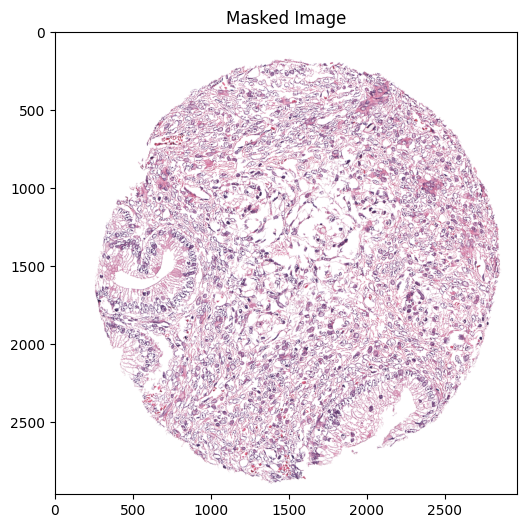

In [100]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mask_image(image, mask, min_contour_area=100):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]
    contour_mask = np.zeros_like(image)
    cv2.drawContours(contour_mask, large_contours, -1, (255, 255, 255), thickness=cv2.FILLED)
    masked_image = np.where(contour_mask == np.array([255, 255, 255]), image, np.array([255, 255, 255]))
    return masked_image


# Example usage
image_path = "/root/ubc_ocean/TMA_images/train_images/4134.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply segmentation to get the mask
mask = segment_tissue(image)

# Mask the image based on the mask
masked_image = mask_image(image, mask)

# Visualize the masked image
plt.figure(figsize=(6, 6))
plt.imshow(masked_image)
plt.title('Masked Image')
plt.show()

-----------

## Core detection

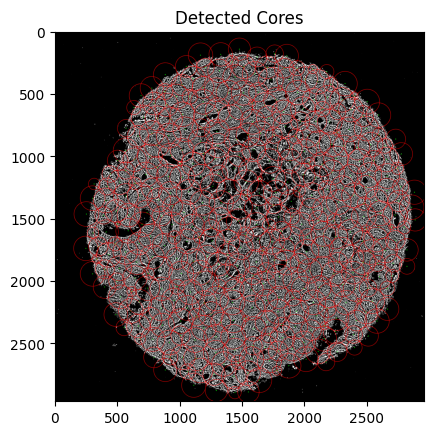

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_visualize_cores(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply median blur to reduce noise for better circle detection
    blurred = cv2.medianBlur(gray, 5)
    
    # Hough Circle Transform to detect circles
    # Adjust these parameters for your specific image
    circles = cv2.HoughCircles(
        blurred, 
        cv2.HOUGH_GRADIENT, 
        dp=1.2, 
        minDist=100,
        param1=50, 
        param2=30, 
        minRadius=10, 
        maxRadius=100
    )
    
    # Visualize the detected cores
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw the outer circle
            cv2.circle(image, (i[0], i[1]), i[2], (255, 0, 0), 2)
            # Draw the center of the circle
            cv2.circle(image, (i[0], i[1]), 2, (0, 255, 0), 3)
    
    # Display the image with detected cores
    plt.imshow(image)
    plt.title('Detected Cores')
    plt.show()

    return circles

# Load the image
image_path = '/root/ubc_ocean/TMA_images/train_images/4134.png'  # Replace with the path to your TMA image
image = cv2.imread(image_path)
image = segment_tissue(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

# Detect and visualize cores
detected_cores = detect_and_visualize_cores(image)


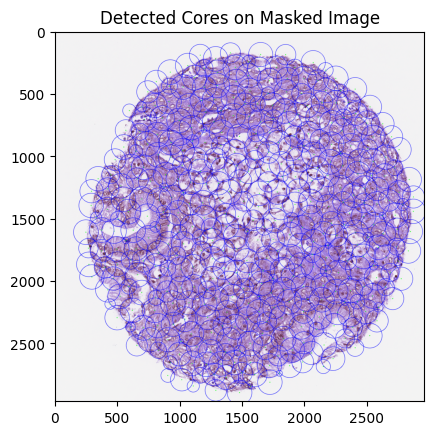

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def detect_and_visualize_cores_on_mask(mask, original_image):
    # Convert to grayscale
    gray = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

    # Apply the mask to the grayscale image
    masked_gray = cv2.bitwise_and(gray, gray, mask=mask)

    # Apply median blur
    blurred = cv2.medianBlur(masked_gray, 5)

    # Hough Circle Transform to detect circles
    circles = cv2.HoughCircles(
        blurred, 
        cv2.HOUGH_GRADIENT, 
        dp=1.2, 
        minDist=100,
        param1=50, 
        param2=30, 
        minRadius=10, 
        maxRadius=100
    )
    
    # Visualize the detected cores on the original image
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw the outer circle
            cv2.circle(original_image, (i[0], i[1]), i[2], (255, 0, 0), 2)
            # Draw the center of the circle
            cv2.circle(original_image, (i[0], i[1]), 2, (0, 255, 0), 3)
    
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Cores on Masked Image')
    plt.show()

    return circles

# Load the image
image_path = '/root/ubc_ocean/TMA_images/train_images/4134.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply segmentation to get the mask
mask = segment_tissue(image_rgb)

# Detect and visualize cores on the masked image
detected_cores = detect_and_visualize_cores_on_mask(mask, image_rgb)

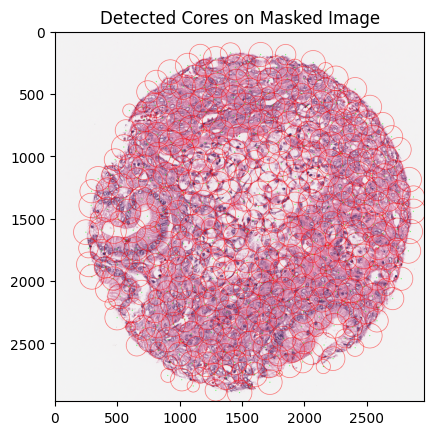

In [20]:
plt.imshow(image_rgb)
plt.title('Detected Cores on Masked Image')
plt.show()